# Validating Model

### Why?
You must validated if you want to make statistical inferences. P-value of slope, confidence interval of slope, $R^2$, etc. are claims necessary for influence, so we must validate model to validate claims

But if you just want to make predictions, you do not need to be strict about these assumptions for the most part.

### How?
  * To validate, we must demonstrate that sample data doesn't contradict the 4 assumptions

### 4 Assumptions of Linear Regression Model
  * Linearity: mean of y is linearly determined by predictors
  * Independence: with different X , responses are independent
  * Normality: random noise and y follow normal distribution
  * Equal variance: variance for y are all equal even if values of predictors are different



In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

housing = pd.read_csv('./data/housing.csv', sep=r'\s*,\s*', encoding='ascii', engine = 'python')
housing.head()

# Linear Regression Model
model = smf.ols(formula='MEDV ~ LSTAT', data=housing).fit()
b0 = model.params[0]
b1 = model.params[1]
housing['BestFit'] = b0 + b1*housing['LSTAT']



 
# Demonstrating Linearity
  * check that scatter plot shows roughly linear pattern
  


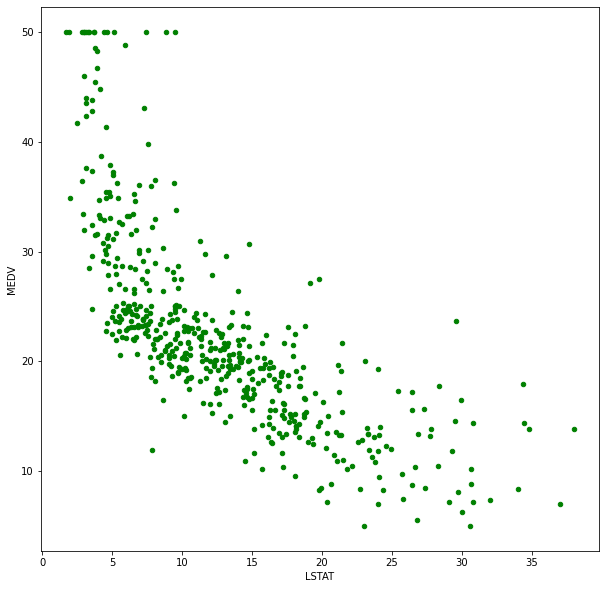

In [6]:
housing.plot(kind='scatter', x = 'LSTAT', y = 'MEDV', color='g', figsize=(10,10)) 
#here the pattern is roughly curved, assumption of linearity violated

# Demonstrating Independence
  * show there's no serial correlation in errors
  * plot observed error and check that there's no obvious pattern in plot
  * for quantitative test, use Durbin-Watson test
  
Durbin-Watson: $ d= \frac{\sum_{t=2}^T (e_t - e_{t-1})^2}{\sum_{t=1}^T e_t^2}$

Rule of Thumb: test statistics between 1.5 - 2.5 are rated normal (no correlation)
  * below 1.5 : maybe positively correlated
  * above 2.5 : maybe negatively correlated 

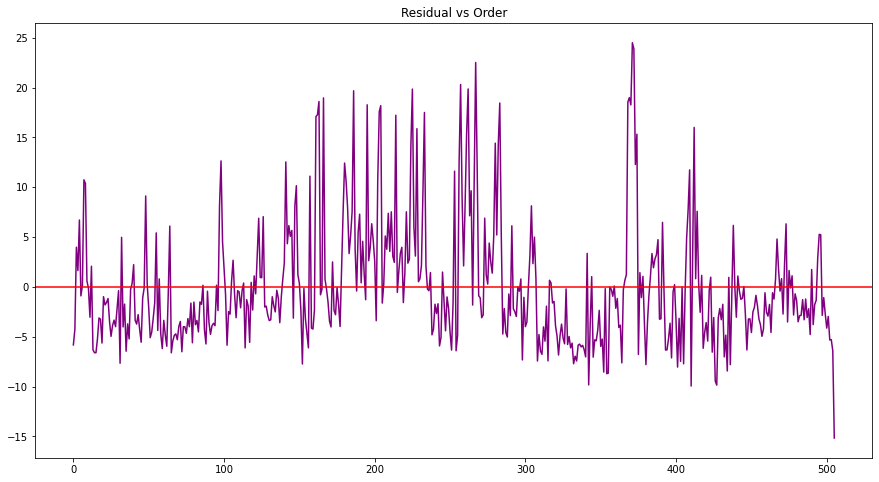

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           5.08e-88
Time:                        17:48:54   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Visual Test
housing['ObservedError'] = housing['MEDV'] - housing['BestFit']
plt.figure(figsize=(15,8))
plt.title('Residual vs Order')
plt.plot(housing.index, housing['ObservedError'], color='purple')
plt.axhline(y=0,color='red')
plt.show()

# Method 2: check Durbin-Watson number
model.summary()

# Here we see thatthe Durbin-Watson value is under 1.5. 
#This shows that the assumption of independence has been violated

# Demonstrating Normality
  * use quantile-quantile plot

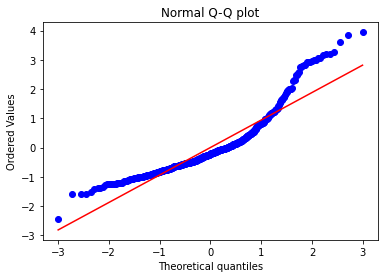

In [11]:
import scipy.stats as stats
z = (housing['ObservedError'] - housing['ObservedError'].mean())/housing['ObservedError'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

# Here we see that normalized error really deviates from the red line. So, assumption of normality is also violated

# Demonstrating Equal Variance
  * plot observed error vs predictor

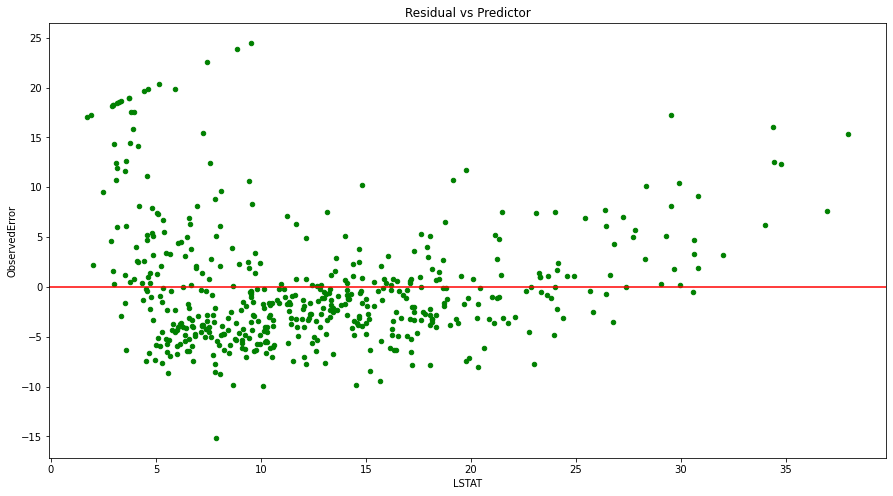

In [14]:
housing.plot(kind='scatter', x='LSTAT', y='ObservedError', figsize=(15,8), color='green')
plt.title('Residual vs Predictor')
plt.axhline(y=0, color='red')
plt.show()

# If there is equal variance, there should not be pattern on the plot. 
# However, noise variance does tend to be larger for larger LSTAT. So assumption of equal variance violated 